In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import os, sys
import requests

In [2]:
pickle1 = "./Pickles/china_center.pickle"
pickle2 = "./Pickles/coro_center.pickle"
pickle3 = "./Pickles/ele_center.pickle"

with open(pickle1, 'rb') as data:
    dff1 = pickle.load(data)

with open(pickle2, 'rb') as data:
    dff2 = pickle.load(data)
    
with open(pickle3, 'rb') as data:
    dff3 = pickle.load(data)
    
dff1 = pd.DataFrame(dff1)
dff2 = pd.DataFrame(dff2)
dff3 = pd.DataFrame(dff3)
len(dff1+dff2+dff3)

2367

In [3]:
path = "./dataset/central/txt_file/" # central data
names = []
    
for i in range(322):
    names.append("china_"+str(i)+".txt")
    
for i in range(828):
    names.append("corona_"+str(i)+".txt")
    
for i in range(2367):
    names.append("elec_"+str(i)+".txt")

In [4]:
print(dff1.loc[158]['title'])

Why China scares politicians of all stripes


In [5]:
news = []
titles = []
links = []
df = pd.DataFrame()
count1 = 0
count2 = 0 
count3 = 0 
for filename in names:
    #title = filename.split('.')[0]
    tmp = filename[:3]
    filename = path + filename
    tmp_count = len(news)
    with open(filename, "r" , encoding='utf-8') as file:
        text = file.read()
        news.append(text) 
        #if tmp_count < len(news):
        if tmp == "chi":
            #if type(dff1.loc[count1]['title']) == float:
             #   dff1.loc[count1]['title'] = "tmp"
              #  print("tmp")
            titles.append(dff1.loc[count1]['title']+"_"+ dff1.loc[count1]['link'][10:22])
            links.append(dff1.loc[count1]['link'])
            count1 += 1
        elif tmp == "cor":
            titles.append(dff2.loc[count2]['title']+"_"+ dff2.loc[count2]['link'][10:22])
            links.append(dff2.loc[count2]['link'])
            count2 += 1
        else:
            titles.append(dff3.loc[count3]['title']+"_"+ dff3.loc[count3]['link'][10:22])   
            links.append(dff3.loc[count3]['link'])
            count3 += 1
            
            
lables = ["central" for i in range(len(news))]
df['Content'] = list(news)
df['Category'] = lables
df['Title'] = titles
df['Link'] = links

### Central data info

In [6]:
df['News_length'] = df['Content'].str.len()

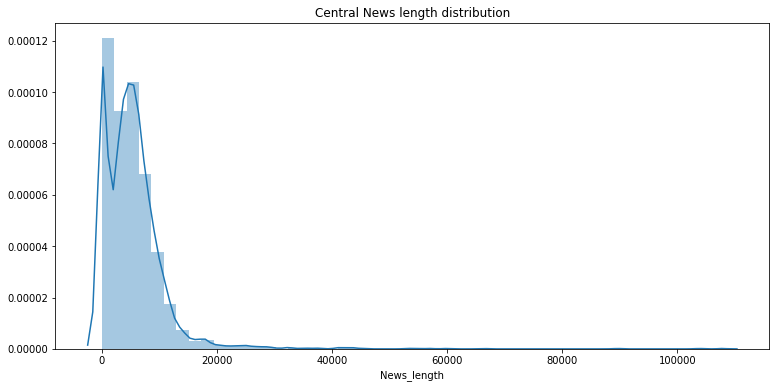

In [7]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('Central News length distribution');

In [8]:
df['News_length'].describe()

count      3517.000000
mean       5383.443844
std        5963.509134
min           0.000000
25%        1953.000000
50%        4740.000000
75%        7298.000000
max      107893.000000
Name: News_length, dtype: float64

In [9]:
df_more10k = df[df['News_length'] < 50]
len(df_more10k)

552

Remove from the 95% percentile onwards to better appreciate the histogram:

In [10]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] > 200]


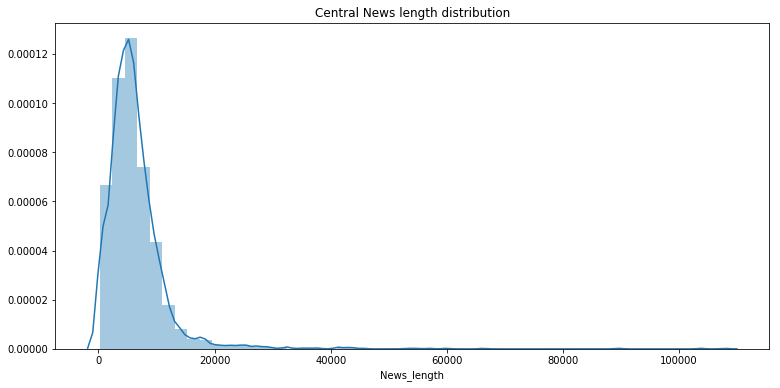

In [11]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('Central News length distribution');

In [12]:
df_95['News_length'].describe()

count      2961.000000
mean       6394.090848
std        5981.675360
min         221.000000
25%        3522.000000
50%        5445.000000
75%        7900.000000
max      107893.000000
Name: News_length, dtype: float64

In [13]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

385

In [14]:
pickle1 = "./Pickles/china_left.pickle"
pickle2 = "./Pickles/coro_left.pickle"
pickle3 = "./Pickles/ele_left.pickle"

with open(pickle1, 'rb') as data:
    dff1 = pickle.load(data)

with open(pickle2, 'rb') as data:
    dff2 = pickle.load(data)
    
with open(pickle3, 'rb') as data:
    dff3 = pickle.load(data)
    
dff1 = pd.DataFrame(dff1)
dff2 = pd.DataFrame(dff2)
dff3 = pd.DataFrame(dff3)
len(dff1+dff2+dff3)

3177

In [15]:
path = "./dataset/free_left/txt_file/" # leftt wing data
names = []
    
for i in range(182):
    names.append("china_"+str(i)+".txt")
    
for i in range(634):
    names.append("corona_"+str(i)+".txt")
    
for i in range(3177):
    names.append("elec_"+str(i)+".txt")

In [16]:
news = []
titles = []
links = []
df2 = pd.DataFrame()
count1 = 0
count2 = 0 
count3 = 0 
for filename in names:
    #title = filename.split('.')[0]
    tmp = filename[:3]
    filename = path + filename
    tmp_count = len(news)
    with open(filename, "r" , encoding='utf-8') as file:
        text = file.read()
        news.append(text) 
        #if tmp_count < len(news):
        if tmp == "chi":
            titles.append(dff1.loc[count1]['title']+"_"+ dff1.loc[count1]['link'][10:22])
            links.append(dff1.loc[count1]['link'])
            count1 += 1
        elif tmp == "cor":
            titles.append(dff2.loc[count2]['title']+"_"+ dff2.loc[count2]['link'][10:22])
            links.append(dff2.loc[count2]['link'])
            count2 += 1
        else:
            titles.append(dff3.loc[count3]['title']+"_"+ dff3.loc[count3]['link'][10:22])   
            links.append(dff3.loc[count3]['link'])
            count3 += 1
            
            
lables = ["left" for i in range(len(news))]
df2['Content'] = news
df2['Category'] = lables
df2['Title'] = titles
df2['Link'] = links

### Left data info

In [17]:
df2['News_length'] = df2['Content'].str.len()

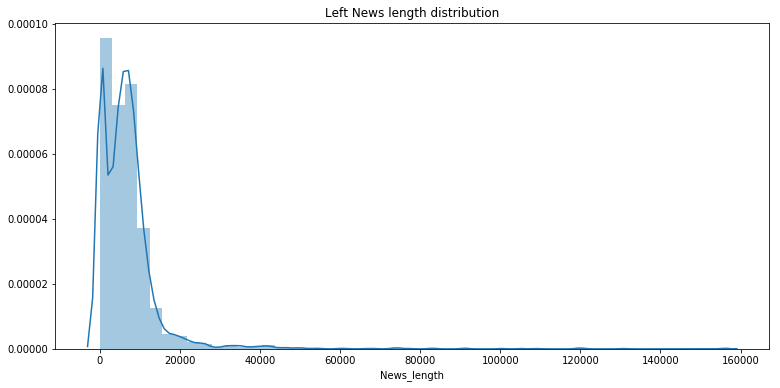

In [18]:
plt.figure(figsize=(12.8,6))
sns.distplot(df2['News_length']).set_title('Left News length distribution');

In [19]:
df2['News_length'].describe()

count      3993.000000
mean       6966.324067
std        9340.448405
min           0.000000
25%        2084.000000
50%        5883.000000
75%        8837.000000
max      156053.000000
Name: News_length, dtype: float64

In [20]:
df_more10k = df2[df2['News_length'] > 10000]
len(df_more10k)

717

In [21]:
quantile_95_2 = df2['News_length'].quantile(0.95)
df_95_2 = df2[df2['News_length'] > 300]

In [22]:
df_95_2['News_length'].describe()

count      3521.000000
mean       7894.646123
std        9573.343823
min         301.000000
25%        3853.000000
50%        6535.000000
75%        9256.000000
max      156053.000000
Name: News_length, dtype: float64

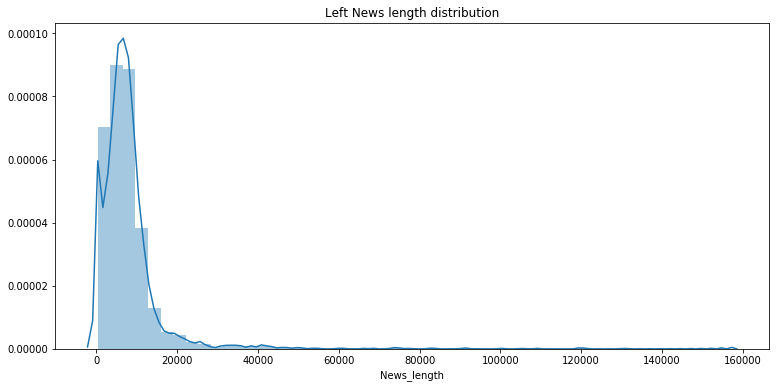

In [23]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95_2['News_length']).set_title('Left News length distribution');

In [24]:
pickle1 = "./Pickles/china_right.pickle"
pickle2 = "./Pickles/coro_right.pickle"
pickle3 = "./Pickles/ele_right.pickle"

with open(pickle1, 'rb') as data:
    dff1 = pickle.load(data)

with open(pickle2, 'rb') as data:
    dff2 = pickle.load(data)
    
with open(pickle3, 'rb') as data:
    dff3 = pickle.load(data)
    
dff1 = pd.DataFrame(dff1)
dff2 = pd.DataFrame(dff2)
dff3 = pd.DataFrame(dff3)
len(dff1+dff2+dff3)

2935

In [25]:
path = "./dataset/conserve_right/txt_file/" # leftt wing data

names = []
    
for i in range(158):
    names.append("china_"+str(i)+".txt")
    
for i in range(581):
    names.append("corona_"+str(i)+".txt")
    
for i in range(2735):
    names.append("elec_"+str(i)+".txt")

In [26]:
news = []
titles = []
links = []
df3 = pd.DataFrame()
count1 = 0
count2 = 0 
count3 = 0 
for filename in names:
    #title = filename.split('.')[0]
    tmp = filename[:3]
    filename = path + filename
    tmp_count = len(news)
    with open(filename, "r" , encoding='utf-8') as file:
        text = file.read()
        news.append(text) 
        #if tmp_count < len(news):
        if tmp == "chi":
            titles.append(dff1.loc[count1]['title']+"_"+ dff1.loc[count1]['link'][10:22])
            links.append(dff1.loc[count1]['link'])
            count1 += 1
        elif tmp == "cor":
            titles.append(dff2.loc[count2]['title']+"_"+ dff2.loc[count2]['link'][10:22])
            links.append(dff2.loc[count2]['link'])
            count2 += 1
        else:
            titles.append(dff3.loc[count3]['title']+"_"+ dff3.loc[count3]['link'][10:22])   
            links.append(dff3.loc[count3]['link'])
            count3 += 1
            
            
lables = ["right" for i in range(len(news))]
df3['Content'] = list(news)
df3['Category'] = lables
df3['Title'] = titles
df3['Link'] = links

### Right data info

In [27]:
df3['News_length'] = df3['Content'].str.len()

In [28]:
df_more10k = df3[df3['News_length'] > 10000]
len(df_more10k)

234

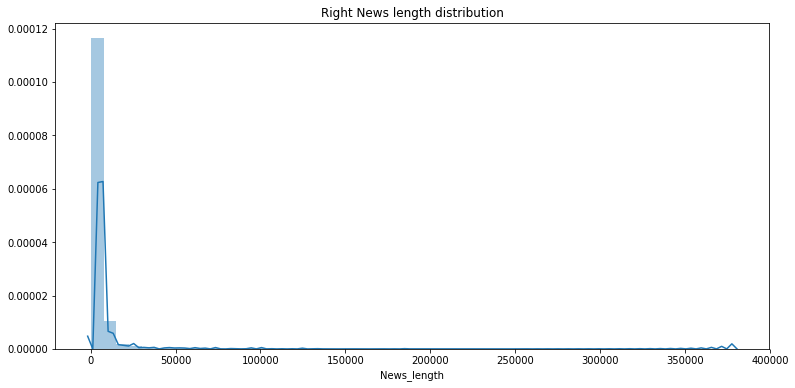

In [29]:
plt.figure(figsize=(12.8,6))
sns.distplot(df3['News_length']).set_title('Right News length distribution');

In [30]:
df3['News_length'].describe()

count      3474.000000
mean       5386.262522
std       11476.087421
min           0.000000
25%        1952.500000
50%        3623.500000
75%        5821.000000
max      378860.000000
Name: News_length, dtype: float64

In [31]:
quantile_95_3 = df3['News_length'].quantile(0.95)
df_95_3 = df3[df3['News_length'] > 300]

In [32]:
df_95_3['News_length'].describe() # delete too long texts

count      3165.000000
mean       5907.663191
std       11895.573161
min         307.000000
25%        2309.000000
50%        4032.000000
75%        5989.000000
max      378860.000000
Name: News_length, dtype: float64

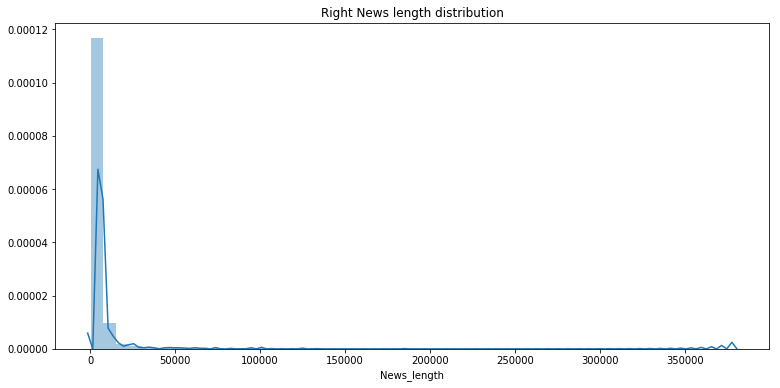

In [33]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95_3['News_length']).set_title('Right News length distribution');

In [34]:
final_data = pd.concat([df_95,df_95_2,df_95_3],axis=0, ignore_index=True)

In [35]:
with open('./Pickles/News_dataset.pickle', 'wb') as output:
    pickle.dump(final_data, output)